<a href="https://colab.research.google.com/github/aminghafari1/lcaging-fmri/blob/main/lcaging_scan_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np


Mounted at /content/gdrive


In [2]:
import scipy.io as sio
runs=["run1","run2","run3","run4","run5"]
print(runs[0])

run1


In [3]:
import glob
def substring_after(s,delim):
  return s.partition(delim)[2]
def substring_before(s,delim):
  return s.partition(delim)[0]

In [4]:
## When you need to change the subject index, sometimes it is associated with changing the session index as well. Check the data each time. 
## For example from BAP103 to BAP 102, because the visual data were stored in the third session, we needed to change the adress in four parts.
## namely in two parts we changed the BAP index from 103 to 102, and two parts from ses 2 to ses 3.
for run_index in range(len(runs)):
  file_directory=glob.glob('/content/gdrive/Shareddrives/LC-Aging/'\
  'Older Adult - MRI Study/Data Collection/BAP/BAP data/'\
  'sub-BAP102/ses-3/InsideScanner/'\
  'subjectBAP102_Voddball_session3_'\
  '%s' \
  '*.mat' %(runs[run_index]))
  if "eyetrack" in file_directory[0]:
    file_directory[0]=file_directory[1]
  file_directory=file_directory[0]
  current_run=sio.loadmat(file_directory)
  isoddball=current_run['isoddball']
  iscorr=current_run['iscorr']
  trial_offset=current_run['trial_offset']
  reaction_time=current_run['Resp1EndTimeP_SBP']-current_run['Resp1StartTimeP']
  nan_indices=np.where(np.isnan(iscorr)==True)
  nan_indices=nan_indices[1]
  reaction_time=reaction_time[~np.isnan(reaction_time)]
  iscorr_corrected=iscorr[~np.isnan(iscorr)]
  trial_offset_corrected=trial_offset[~np.isnan(iscorr)]
  isoddball_corrected=isoddball[~np.isnan(iscorr)]
  print('The shape for the offset_trial_corrected in run %d' %(run_index), 'is:',np.shape(trial_offset_corrected), 'The shape for the reaction time is:' ,np.shape(reaction_time))
  offsets_no_repeat_sorted=np.sort(np.unique(trial_offset))
  accuracy=np.zeros((np.size(offsets_no_repeat_sorted)))
  reaction=np.zeros((np.size(offsets_no_repeat_sorted)))
  print(np.shape(accuracy))
  if run_index==0:
    accuracies=np.zeros((np.size(accuracy),np.size(runs)))
    reactions=np.zeros((np.size(reaction),np.size(runs)))
  for i in range(len(offsets_no_repeat_sorted)):
    corrects=0
    total_time_to_react=0
    for j in range(len(iscorr_corrected)):
      if trial_offset_corrected[j]==offsets_no_repeat_sorted[i]:
        if iscorr_corrected[j]==1:
          corrects=corrects+1
        total_time_to_react=total_time_to_react+reaction_time[j]
    accuracy[i]=corrects/np.count_nonzero(trial_offset_corrected==offsets_no_repeat_sorted[i])
    reaction[i]=total_time_to_react/np.count_nonzero(trial_offset_corrected==offsets_no_repeat_sorted[i])
  accuracies[run_index,:]=accuracy
  reactions[run_index, :]=reaction

## for now the reaction time calculation method is as follows: sum of the reaction times as each stimulus level is devided by 
## the number of times each oddball level is shown, and we haven't taken into consideration the correctness of the answer given by the subjects.



The shape for the offset_trial_corrected in run 0 is: (30,) The shape for the reaction time is: (30,)
(5,)
The shape for the offset_trial_corrected in run 1 is: (30,) The shape for the reaction time is: (30,)
(5,)
The shape for the offset_trial_corrected in run 2 is: (30,) The shape for the reaction time is: (30,)
(5,)
The shape for the offset_trial_corrected in run 3 is: (30,) The shape for the reaction time is: (30,)
(5,)
The shape for the offset_trial_corrected in run 4 is: (30,) The shape for the reaction time is: (30,)
(5,)


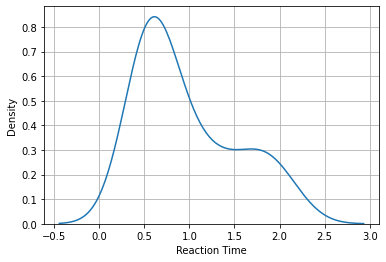

In [ ]:
import seaborn as sns

sns.kdeplot(reaction_time)
plt.xlabel('Reaction Time')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [ ]:
from scipy.stats import zscore
log_reaction_time=np.log(reaction_time)


In [ ]:
log_reaction_time

array([-0.11650932,  0.60993393,  0.27784368, -0.56233245, -0.40067475,
       -0.61615558, -0.61658122,  0.36475151, -0.61633189, -0.44623742,
        0.11324038, -0.71344112, -0.96767824, -0.56226665, -0.77683666,
        0.7082605 ,  0.60452758, -0.6933366 , -0.12777485, -0.19831741,
        0.55405315, -0.46221817, -0.61640783, -0.75494046,  0.7468766 ,
        0.06767594,  0.30770806, -0.47786743,  0.54205978, -0.23576816])

In [ ]:
reactions

array([[0.99011445, 1.28842267, 1.42011777, 1.18844028, 0.8366518 ],
       [1.00678473, 1.37514348, 1.81857543, 1.35355152, 0.93678482],
       [0.8317642 , 0.77512342, 1.38353642, 0.9234722 , 0.49166555],
       [0.74834248, 1.22849383, 1.44358057, 1.08847608, 0.93842323],
       [1.10009777, 1.15181423, 1.0451003 , 1.00828252, 0.54823927]])

In [ ]:
temp=substring_after(file_directory,"sub-")
subject_index=substring_before(temp,"/ses")
print(subject_index)

  

BAP102


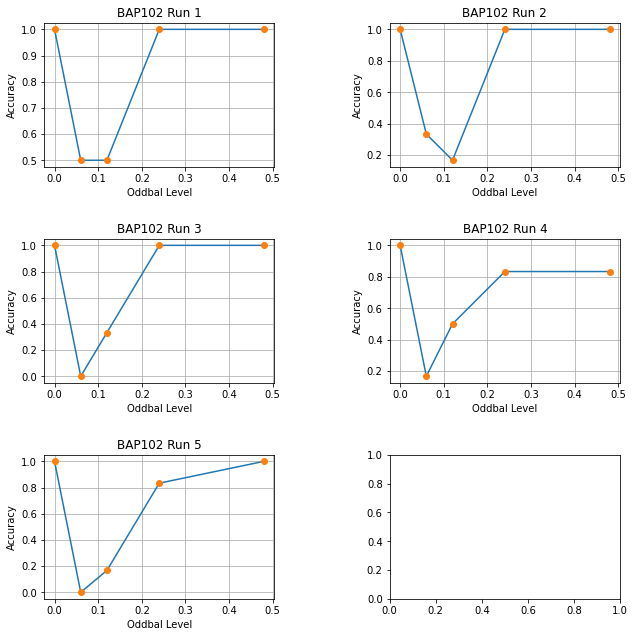

In [ ]:
import matplotlib.pyplot as plt
num_rows=accuracies.shape[0]
fig ,axes=plt.subplots(nrows=(num_rows//2)+1, ncols=2, figsize=(10,10))

for i, ax in enumerate(axes.ravel()):
  if i<num_rows:
    ax.plot(offsets_no_repeat_sorted,accuracies[i])
    ax.plot(offsets_no_repeat_sorted,accuracies[i], 'o', label='data points')
    ax.set_title(f"%s Run {i+1}" %(subject_index))
    ax.set_xlabel("Oddbal Level")
    ax.set_ylabel("Accuracy")
    ax.grid(True)
plt.subplots_adjust(wspace=0.5, hspace=0.5, left=0.1, right=0.9, top=0.9, bottom=0.1)
import os.path
from os import path
if path.exists('/content/gdrive/Shareddrives/LC-Aging/LC_aging_fMRI/%s' %(subject_index)) == False:
  os.mkdir('/content/gdrive/Shareddrives/LC-Aging/LC_aging_fMRI/%s' %(subject_index))
save_directory=('/content/gdrive/Shareddrives/LC-Aging/LC_aging_fMRI/%s' %(subject_index))
plt.savefig(f"{save_directory}/accuracy.png")

<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
pd.DataFrame(accuracies).to_csv("%s/accuracy_results.csv" %(save_directory))